In [1]:
import pickle
from IPython.display import clear_output

import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

import Plib.DataFarm.IEXdata as datafarm
import Plib.Backtester.Backtrader as bt
import Plib.Signals.TAnalysis as signalsfarm
import Plib.Utils.Tools as tls

import warnings
warnings.filterwarnings("ignore")
#import pyfolio as pf
#pf.create_returns_tear_sheet(r['Returns'])
%matplotlib inline

/Users/rob/opt/intelpython/latest/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject
  return f(*args, **kwds)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
dt_start,dt_end='2006-12-28','2009-04-30'
tz='America/New_York'
tickers=['MSFT']
params=[40,10]
algo_params={'Type':'KELLY','MSFT':{'KELLY':0.13,'CURR':2500,'FRAC':0.1,'STYPE':'STK'}}
stat_params={'freq':'D','MAR':-0.001,'ConfLev':0.95,'net_comm':False,
             'Leverage':1.25,'log_rets':False,'SnapType':'silent'}
freq='D'
fname='algo451.pickle'
with open(fname, 'rb') as handle:
    data = pickle.load(handle) 

In [3]:
df=signalsfarm.removeOutliers(data['0'].copy())

Series: Open outliers: 0
[]
Series: High outliers: 1
[100000.0]
Series: Low outliers: 0
[]
Series: Close outliers: 0
[]
Series: Adjusted_close outliers: 0
[]
Series: Volume outliers: 6
[288121167, 185635717, 196992268, 291138864, 228488900, 222435525]


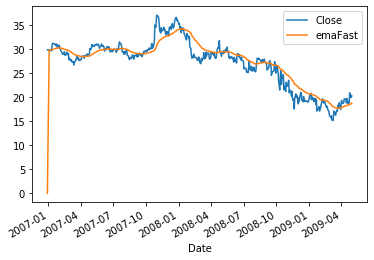

In [4]:
w1=50
df1=signalsfarm.getEMA(df.copy(),'Close',w1,'emaFast').fillna(0)
df1[['Close','emaFast']].plot()

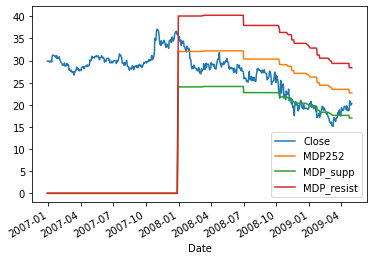

In [5]:
df1=signalsfarm.getMidpointSR(df.copy(), winroll=252, sr=0.25, lbl_out='', s=0)
df1[['Close','MDP252','MDP_supp','MDP_resist']].plot()


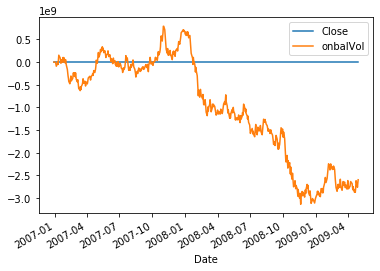

In [37]:
df1=signalsfarm.getOnBalanceVol(df.copy(),lbl_comp1='Close',lbl_comp2='Volume',lbl_out='',s=0)
df1[['Close','onbalVol']].plot()

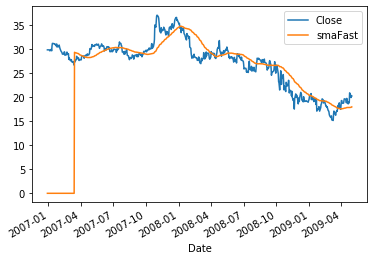

In [5]:
w1=50
df1=signalsfarm.getSMA(df.copy(),'Close',w1,'smaFast').fillna(0)
df1[['Close','smaFast']].plot()

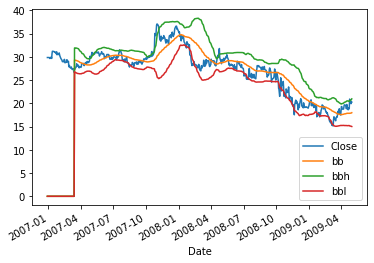

In [6]:
w1=50
sd=2
l=['bb','bbh','bbl']
df1=signalsfarm.getBollingerBands(df.copy(),'Close',w1,sd,l).fillna(0)
df1[['Close','bb','bbh','bbl']].plot()


In [7]:
w1=5
df1=signalsfarm.getATR(df.copy(),lbl_comp='Close', winma=w1,type='SMA',lbl_out='ATR')
df1.head(15).tail(2)

Open   High    Low  Close  Adjusted_close      Volume     ATR  \
Date                                                                          
2007-01-22  31.065  31.12  30.51  30.72           30.72  56152041.0  0.5364   
2007-01-23  30.630  30.96  30.52  30.74           30.74  49190300.0  0.4800   

              HCW    LCW  
Date                      
2007-01-22  31.45  30.51  
2007-01-23  31.44  30.51

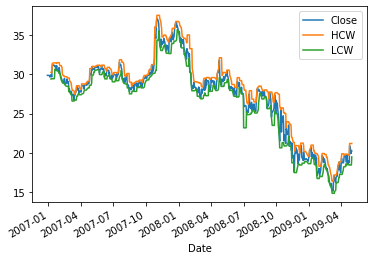

In [8]:
df1[['Close','HCW','LCW']].plot()


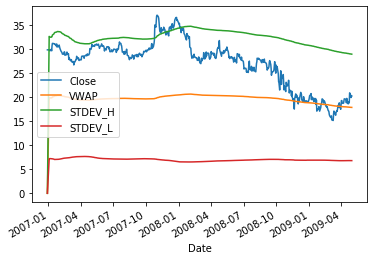

In [9]:
df1=signalsfarm.getVWAP(df.copy(),bands=True,sd_range=1.28)
df1[['Close','VWAP','STDEV_H','STDEV_L']].plot()

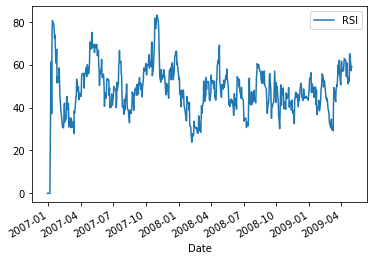

In [10]:
w1=15
df1=signalsfarm.getRSI(df.copy(),lbl_comp='Close', winma=15,type='EMA',lbl_out='RSI')
df1[['RSI']].plot()

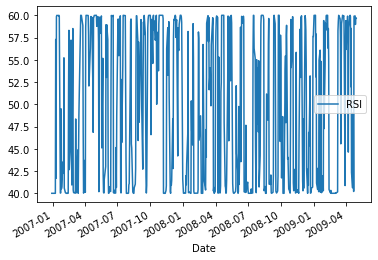

In [16]:
# 5
df1=signalsfarm.getRSIFT(df.copy(),lbl_comp='Close', winma=5,type='',lbl_out='RSI')
df1[['RSI']].plot()

In [ ]:
def rainbow(df, ma1, ma2, ma3, ma4, ma5, ma6, ma7, what, where):
    
    def ema(Data, alpha, lookback, what, where):
    
        # alpha is the smoothing factor
        # window is the lookback period
        # what is the column that needs to have its average calculated
        # where is where to put the exponential moving average

        alpha = alpha / (lookback + 1.0)
        beta  = 1 - alpha

        # First value is a simple SMA
        Data = ma(Data, lookback, what, where)

        # Calculating first EMA
        Data[lookback + 1, where] = (Data[lookback + 1, what] * alpha) + (Data[lookback, where] * beta)
        # Calculating the rest of EMA
        for i in range(lookback + 2, len(Data)):
          try:
            Data[i, where] = (Data[i, what] * alpha) + (Data[i - 1, where] * beta)
                except IndexError:
                    pass
        return Data



    # Converting Exponential lookback to Smoothed Lookback
    ma1 = (ma1 * 2) - 1
    ma2 = (ma2 * 2) - 1
    ma3 = (ma3 * 2) - 1
    ma4 = (ma4 * 2) - 1
    ma5 = (ma5 * 2) - 1
    ma6 = (ma6 * 2) - 1
    ma7 = (ma7 * 2) - 1
    
    # Calculating the Smoothed Moving Averages A.K.A The Rainbow   Moving Average
    df = ema(df, 2, ma1, what, where)
    df = ema(df, 2, ma2, what, where + 1)
    df = ema(df, 2, ma3, what, where + 2)
    df = ema(df, 2, ma4, what, where + 3)
    df = ema(df, 2, ma5, what, where + 4)
    df = ema(df, 2, ma6, what, where + 5)
    df = ema(df, 2, ma7, what, where + 6)
    
    # The Rainbow Oscillator
    df[:, where + 7] = df[:, where] - df[:, where + 6]
         
    return df

rainbow(df, ma1, ma2, ma3, ma4, ma5, ma6, ma7, what, where)

In [12]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from __future__ import division

fname='algo457.pickle'
with open(fname, 'rb') as handle:
    data = pickle.load(handle) 

df=data['0']
df=df.set_index('Date')


In [6]:
def getAdditionalPerformance(df):
    import Plib.Signals.TAnalysis as signalsfarm
    
    result=signalsfarm.getZigZagStats(df)
    highs = signalsfarm.getHighs(df)
    trn = signalsfarm.tradeRoundNumbers(df, perc = 0.1, fract = 1, side = 'h')
    dv = signalsfarm.getDVolume(df)
    data = [['N_Highs', highs], ['Trade Round N', trn], ['Dollar Vol', dv]]
    filters = pd.DataFrame(data, columns = ['','Stats'])
    filters = filters.set_index('')
    result=result.append(filters)
    return result



In [7]:
getAdditionalPerformance(df)

Stats
Peaks returns                         0.010307
Peaks duration       1 days 11:21:18.237885462
Peaks consistency                     0.536246
Valleys returns                      -0.010871
Valleys duration     1 days 10:58:57.487231869
Valleys consistency                   0.462338
N_Highs                                      5
Trade Round N                            False
Dollar Vol                            69149009

In [10]:
def preFilters(df, treshold=3, weights=[1,1,1,1]):
    import Plib.Signals.TAnalysis as signalsfarm
    
    res = signalsfarm.getTradedMonths(df, min_months = 10)*weights[0]
    print(res)
    res = res + signalsfarm.getMinOverTime(df, lbl='Close',periods=2520)*weights[1]
    print(res)
    res = res + signalsfarm.getMinOverLastYear(df, lbl='Close',periods=2520)*weights[2]
    print(res)
    res = res + signalsfarm.getMaxOverLastYear(df, lbl='Close',periods=2520)*weights[3]
    print(res)
    return res >= treshold


In [11]:
preFilters(df)

1
2
3
3


False

In [ ]:
def getMinOverLastYear(df, lbl='Close',periods=2520):
    hmin = df[lbl][:-252].rolling(min_periods=1, window=periods, center=False).min()[-1]
    lastYearMin = df[lbl].rolling(min_periods=1, window=252, center=False).min()[-1]
    return hmin < lastYearMin

def getMaxOverLastYear(df, lbl='Close',periods=2520):
    hmax = df[lbl][:-252].rolling(min_periods=1, window=periods, center=False).max()[-1]
    lastYearMax = df[lbl].rolling(min_periods=1, window=252, center=False).max()[-1]
    return hmax<lastYearMax


In [12]:
df['Close'][:-252]

Date
2000-01-03    1592.20
2000-01-04    1638.70
2000-01-05    1595.80
2000-01-06    1617.60
2000-01-07    1613.30
               ...   
2015-12-17    7844.35
2015-12-18    7761.95
2015-12-21    7834.45
2015-12-22    7786.10
2015-12-23    7865.95
Name: Close, Length: 3983, dtype: float64

In [13]:
df['Close'][-252:]

Date
2015-12-24    7861.05
2015-12-28    7925.15
2015-12-29    7928.95
2015-12-30    7896.25
2015-12-31    7946.35
               ...   
2016-12-26    7908.25
2016-12-27    8032.85
2016-12-28    8034.85
2016-12-29    8103.60
2016-12-30    8185.80
Name: Close, Length: 252, dtype: float64